In [1]:
from colormath.color_objects import LabColor, XYZColor, sRGBColor
from colormath.color_conversions import convert_color
from colr import Colr as C
import random as r

#     print(C().rgb(r,g,b, 'Output.'))

def lab_to_rgb(a, b, c):
    lab = LabColor(a,b,c)
    rgb = convert_color(lab, sRGBColor)
    r = rgb.clamped_rgb_r * 255
    g = rgb.clamped_rgb_g * 255
    b = rgb.clamped_rgb_b * 255
    return [r,g,b]

    
# it looks slightly different than the initial lab, but when we 
# take the lab result and go back to rgb, the rgb is retained so I guess it's ok?
def rgb_to_lab(a, b, c):
    rgb = sRGBColor(a, b, c, is_upscaled=True)
    xyz = convert_color(rgb, XYZColor, target_illuminant='d50')
    lab = convert_color(xyz, LabColor)
    return lab.get_value_tuple()

def print_combo(fg, bg):
#     print("color", fg)
    for i in range(0,3):
        if fg[i] > 255:
            fg[i] = 255
        if bg[i] > 255:
            bg[i]= 255
    print(C().b_rgb(bg[0], bg[1], bg[2]) .rgb(fg[0], fg[1], fg[2], 'Lorem ipsum.'))

# generates a high contrast color pairing
# lab is l: [0,100] a: [-128, 128] b: [-128, 128]
def generate_two_color():
    light = r.uniform(0, 50)
    dark = light + r.uniform(40, 60)
    if (dark > 100):
        dark = 100;
        
    a1 = r.uniform(-128, 128)
    a2 = r.uniform(-128, 128)
    b1 = r.uniform(-128, 128)
    b2 = r.uniform(-128, 128)
        
    lab1 = LabColor(light, a1, a2)
    lab2 = LabColor(dark, b1, b2)
    rgb1 = lab_to_rgb(lab1.lab_l, lab1.lab_a, lab1.lab_b )
    rgb2 = lab_to_rgb(lab2.lab_l, lab2.lab_a, lab2.lab_b,)
    print_combo(rgb1, rgb2)
    print_combo(rgb2, rgb1)
#     print("light", light, "dark", dark)
    
# for i in range(0, 10):
#     generate_two_color()

# value = input("Please enter a string:\n")
 
# print(f'You entered {value}')

Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.


In [13]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse


def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()


def generate_two_color(samples):
    
    for color in samples:
        lab_c1=[0,0,0]
        lab_c2 = [0,0,0]
        
        lab_c1[0], lab_c1[1], lab_c1[2] = rgb_to_lab(color[0], color[1], color[2])
    
        if lab_c1[0] < 50: # if the sample color is light: generate a dark color
            lab_c2[0] = lab_c1[0] + r.uniform(40, 60)
        elif lab_c1[0] >= 50: # generate a light color
            lab_c2[0] = lab_c1[0] - r.uniform(40, 60)

        # error checking
        if (lab_c2[0] > 100):
            lab_c2[0] = 100
        if (lab_c2[0] < 0):
            lab_c2[0] = 0

        lab_c2[1] = r.uniform(-128, 128)
        lab_c2[2] = r.uniform(-128, 128)

        lab1 = LabColor(lab_c1[0], lab_c1[1],lab_c1[2])
        lab2 = LabColor(lab_c2[0], lab_c2[1],lab_c2[2])
        rgb1 = lab_to_rgb(lab1.lab_l, lab1.lab_a, lab1.lab_b )
        rgb2 = lab_to_rgb(lab2.lab_l, lab2.lab_a, lab2.lab_b,)
        print_combo(rgb1, rgb2)
        print_combo(rgb2, rgb1)
#     print("light", light, "dark", dark)


inputs: 
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
generated palettes
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.


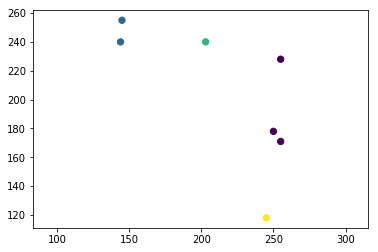

In [15]:


# a list of colors we like in rgb, pastels
likes = [ [255, 228, 171], [255, 171, 209], [144, 240, 155], [245, 118, 130], [250, 178, 162], [145, 255, 187], [203, 240, 168]]

print("inputs: " )
for color in likes:
    print_combo(color, color)

likes = np.reshape(likes, (-1, 3))

gmm = GaussianMixture(n_components=4).fit(likes)
labels = gmm.predict(likes)
plot_gmm(gmm, likes);

samples = gmm.sample(20)[0]
# print("gaussian outputs:")
# for i in range(0, samples.shape[0]):
#     print_combo(samples[i], samples[i])
    
# input sample: RGB

print("generated palettes")
generate_two_color(samples)

